# **Data Visualization**

# Objectives


The objective of this notebook is to explore and understand the [IBM HR Analytics Employee Attrition & Performance dataset](https://www.kaggle.com/datasets/pavansubhasht/ibm-hr-analytics-attrition-dataset)  through descriptive statistics and visual analysis. The focus is on uncovering key patterns and relationships among employee attributes that influence attrition and performance.

# Input
* The input can be found [here]()
* This is a csv file contained the cleaned data outputted by the ETL process.

# Outputs

- All the visualizations have been saved as PNG files and are stored in a designated folder for easy access and reference, which can be found [here](../Images).

---

# Change working directory
Change the working directory from its current folder to its parent folder as the notebooks will be stored in a subfolder
* We access the current directory with os.getcwd()

In [1]:
import os
current_dir = os.getcwd()
current_dir

'c:\\Users\\amron\\Desktop\\employee-turnover-prediction\\jupyter_notebooks'

Make the parent of the current directory the new current directory
* os.path.dirname() gets the parent directory
* os.chir() defines the new current directory

In [2]:
os.chdir(os.path.dirname(current_dir))
print("You set a new current directory")

You set a new current directory


Confirm the new current directory

In [3]:
current_dir = os.getcwd()
current_dir

'c:\\Users\\amron\\Desktop\\employee-turnover-prediction'

Changing path directory to the dataset

In [4]:
#path directory
raw_data_dir = os.path.join(current_dir, 'data_set/raw') 

#path directory
processed_data_dir = os.path.join(current_dir, 'data_set/processed') 


---

# Import packages

In [5]:
import pandas as pd # Import pandas
import matplotlib.pyplot as plt # Import matplotlib
import seaborn as sns # Import seaborn
import plotly.express as px # Import plotly
import plotly.graph_objects as go # Import plotly graph objects
from plotly.subplots import make_subplots # Import plotly subplots
sns.set_style('whitegrid') # Set style for visuals
import numpy as np # Import numpy
from scipy import stats # Import scipy for statistical tests
from scipy.stats import chi2_contingency, ttest_ind, mannwhitneyu, f_oneway# Import chi2_contingency for Chi-square test
import statsmodels.api as sm # Import statsmodels for logistic regression
import pingouin as pg # Import pingouin for statistical tests
from warnings import filterwarnings # Import warnings filterwarnings
filterwarnings('ignore') # Ignore warnings

---

# Load the cleaned dataset

In [6]:
# load the cleaned dataset
df = pd.read_csv(os.path.join(processed_data_dir, 'cleaned_employee_attrition.csv'))
# display the first 5 rows of the dataframe
df.head()   

,Age,Attrition,DistanceFromHome,JobLevel,JobRole,JobSatisfaction,MonthlyIncome,NumCompaniesWorked,OverTime,WorkLifeBalance,YearsSinceLastPromotion,YearsWithCurrManager,Attrition_encoded,OverTime_encoded
0,41,Yes,1,2,Sales Executive,4,5993,8,Yes,1,0,5,1,1
1,49,No,8,2,Research Scientist,2,5130,1,No,3,1,7,0,0
2,37,Yes,2,1,Laboratory Technician,3,2090,6,Yes,3,0,0,1,1
3,33,No,3,1,Research Scientist,3,2909,1,Yes,3,3,0,0,1
4,27,No,2,1,Laboratory Technician,2,3468,9,No,3,2,2,0,0


---

# 1. Work-Life Balance and Attrition
- **Hypothesis:** 
Employees with poor work-life balance are more likely to leave the company.
- **Validation:**

    - Data Preparation:
Encoded the target variable Attrition as binary (1 = Yes, 0 = No).

    - Descriptive Analysis:
Calculated and compared attrition rates across `WorkLifeBalance` categories.

    - Visualization:
Created a bar plot showing `Attrition` rate by `WorkLifeBalance` level to observe trends.

    - Statistical Test:
Performed a Chi-square test of independence to check if `Attrition` and `WorkLifeBalance` are significantly associated.

    - Logistic Regression:
Fitted a logistic regression model (Attrition_encoded ~ WorkLifeBalance) to quantify how work-life balance affects attrition odds.

- H₀: There is no significant relationship between work-life balance and employee attrition.

- H₁:
There is a significant relationship between work-life balance and employee attrition.

- **Decision rule:**

    - If p-value < 0.05, reject H₀ →  The relationship is statistically significant.

     - If p-value ≥ 0.05, fail to reject H₀ →  No significant relationship detected.

In [7]:
# confirm Attrition values are Yes/No
df['Attrition'].value_counts()

Attrition
No     1233
Yes     237
Name: count, dtype: int64

Observations:
- Most employees did not leave (1233 stayed vs 237 left).
- Attrition rate overall = 237 / 1470 ≈ 16.1%.

In [8]:
# confirm WorkLifeBalance values are 1,2,3,4
df['WorkLifeBalance'].value_counts().sort_index()

WorkLifeBalance
1     80
2    344
3    893
4    153
Name: count, dtype: int64

Observations:
- Work-Life Balance is recorded as ordinal values 1–4.
- Most employees report average balance (level 3: 893).

In [9]:
#check data distribution
df.head()

,Age,Attrition,DistanceFromHome,JobLevel,JobRole,JobSatisfaction,MonthlyIncome,NumCompaniesWorked,OverTime,WorkLifeBalance,YearsSinceLastPromotion,YearsWithCurrManager,Attrition_encoded,OverTime_encoded
0,41,Yes,1,2,Sales Executive,4,5993,8,Yes,1,0,5,1,1
1,49,No,8,2,Research Scientist,2,5130,1,No,3,1,7,0,0
2,37,Yes,2,1,Laboratory Technician,3,2090,6,Yes,3,0,0,1,1
3,33,No,3,1,Research Scientist,3,2909,1,Yes,3,3,0,0,1
4,27,No,2,1,Laboratory Technician,2,3468,9,No,3,2,2,0,0


Observations

- Encodes Attrition as numeric (1 = left, 0 = stayed).
- This allows calculation of attrition rates and enables logistic regression analysis.
- Confirms dataset is ready for statistical modeling.

In [10]:
# calculate attrition rate by WorkLifeBalance
attrition_by_wlb = df.groupby('WorkLifeBalance')['Attrition_encoded'].agg(['sum','count'])
attrition_by_wlb['attrition_rate'] = attrition_by_wlb['sum'] / attrition_by_wlb['count']
# print the result
attrition_by_wlb

,sum,count,attrition_rate
WorkLifeBalance,,,
1,25,80,0.312500
2,58,344,0.168605
3,127,893,0.142217
4,27,153,0.176471


Observations:

- Highest attrition rate is among employees with poor work-life balance (level 1: 31.3%).
- Employees with average balance (level 3) have the lowest attrition rate (14.2%).
- Slight increase at level 4 (17.6%), possibly due to smaller sample size (153).
- This supports the hypothesis: poor work-life balance is associated with higher attrition.

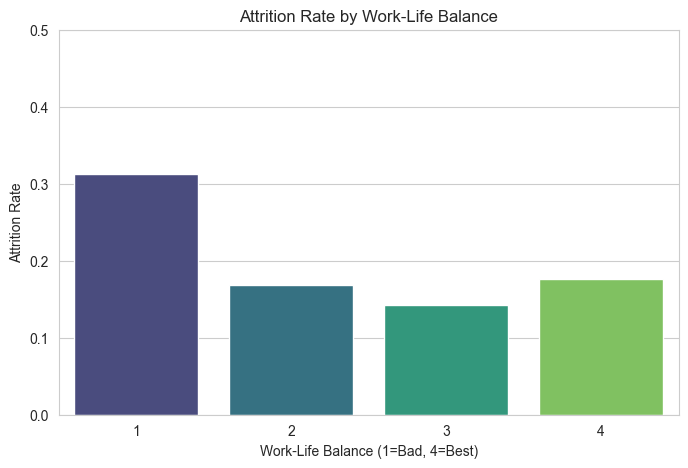

In [11]:
# bar plot of attrition rate by WorkLifeBalance
plt.figure(figsize=(8,5))
sns.barplot(x=attrition_by_wlb.index, y='attrition_rate', data=attrition_by_wlb, palette='viridis')
plt.title('Attrition Rate by Work-Life Balance')
plt.xlabel('Work-Life Balance (1=Bad, 4=Best)')
plt.ylabel('Attrition Rate')
plt.ylim(0, 0.5)
plt.show()


Observations:

- Visualization confirms inverse relationship: lower work-life balance → higher attrition, except for minor fluctuation at level 4.
- Makes the trend immediately visible: poor work-life balance is linked with higher turnover risk.
- Helps communicate findings to stakeholders clearly.

In [12]:
# create wlb_attrition_crosstab table
wlb_attrition_crosstab = pd.crosstab(df['WorkLifeBalance'], df['Attrition'])
# print wlb_attrition_crosstab table
wlb_attrition_crosstab

Attrition,No,Yes
WorkLifeBalance,,
1,55,25
2,286,58
3,766,127
4,126,27


Observations:

- Confirms raw counts match the attrition rates calculated earlier.
- Provides input for the Chi-square test to formally test association.
- Clearly shows that number of leavers decreases as Work-Life Balance improves, especially between levels 1 and 3.

In [13]:
# perform Chi-Squared test
chi2, p, dof, expected = chi2_contingency(wlb_attrition_crosstab)
print(f"Chi-square statistic: {chi2:.3f}")
print(f"Degrees of freedom: {dof}")
print(f"P-value: {p:.4f}")

Chi-square statistic: 16.325
Degrees of freedom: 3
P-value: 0.0010


Observations:

- P-value = 0.001 < 0.05 → reject null hypothesis.
- Indicates a statistically significant association between Work-Life Balance and Attrition.
- Confirms the hypothesis that employees with poor work-life balance are more likely to leave.
- Effect size is moderate (chi-square 16.325 with 3 df), supporting practical significance as well.

In [14]:
# define variables
X = sm.add_constant(df['WorkLifeBalance'])  # add constant term (intercept)
y = df['Attrition_encoded']

# fit logistic regression model
model = sm.Logit(y, X).fit()
print(model.summary())

Optimization terminated successfully.
         Current function value: 0.439689
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:      Attrition_encoded   No. Observations:                 1470
Model:                          Logit   Df Residuals:                     1468
Method:                           MLE   Df Model:                            1
Date:                Thu, 16 Oct 2025   Pseudo R-squ.:                0.004541
Time:                        14:35:03   Log-Likelihood:                -646.34
converged:                       True   LL-Null:                       -649.29
Covariance Type:            nonrobust   LLR p-value:                   0.01517
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              -0.9974      0.272     -3.667      0.000      -1.530      -0.464
WorkLifeBalanc

Observations:
- A logistic regression was conducted to examine the relationship between Work-Life Balance and employee attrition.
- Results indicated that Work-Life Balance was a significant predictor of attrition (β = -0.24, p = 0.014).
- The odds ratio of 0.79 suggests that for each one-unit increase in Work-Life Balance, the odds of leaving the company decrease by approximately 21%, supporting the hypothesis that better work-life balance reduces employee attrition.

### Key Insights:
- Overall attrition in the company is relatively low (~16%), with 237 employees leaving out of 1,470.
- Work-Life Balance is recorded on a 1–4 scale, with most employees reporting average balance (level 3: 893 employees).
- Employees with poor work-life balance (level 1) have the highest attrition rate (31.3%).
- Attrition decreases for employees with average balance (level 3: 14.2%).
- The association between Work-Life Balance and Attrition is statistically significant (χ² = 16.325, df = 3, p = 0.001).
- Bar chart provides an intuitive, visual confirmation of the statistical findings.
- Work-Life Balance is a significant predictor of attrition (β = -0.24, p = 0.014).

### Conclusion: 
Statistical and visual analyses confirm that better work-life balance reduces employee attrition, supporting the hypothesis.

---

# 2. Overtime and Employee Attrition
**Hypothesis:** Employees who work overtime are significantly more likely to quit.  

**Validation:**
- Two-proportion z-test or chi-square test comparing `OverTime = Yes` vs `No` on `Attrition`.
- Plot attrition rates by `OverTime` status.
- Logistic regression with `OverTime` as a key predictor.
* H<sub>0</sub>: There is no significant correlation between Overtime and Attrition. (pval => 0.05)
* H<sub>a</sub>: There is a significant correlation between Overtime and Attrition. (pval < 0.05>)

First we will check the distribution of our data.

In [15]:
df.head()

,Age,Attrition,DistanceFromHome,JobLevel,JobRole,JobSatisfaction,MonthlyIncome,NumCompaniesWorked,OverTime,WorkLifeBalance,YearsSinceLastPromotion,YearsWithCurrManager,Attrition_encoded,OverTime_encoded
0,41,Yes,1,2,Sales Executive,4,5993,8,Yes,1,0,5,1,1
1,49,No,8,2,Research Scientist,2,5130,1,No,3,1,7,0,0
2,37,Yes,2,1,Laboratory Technician,3,2090,6,Yes,3,0,0,1,1
3,33,No,3,1,Research Scientist,3,2909,1,Yes,3,3,0,0,1
4,27,No,2,1,Laboratory Technician,2,3468,9,No,3,2,2,0,0


In [16]:
# normality test
normality_test = pg.normality(df, dv='OverTime_encoded', group='Attrition_encoded')
normality_test

,W,pval,normal
Attrition_encoded,,,
1,0.634583,3.205658e-22,False
0,0.524661,2.425225e-49,False


Both categories are unevenly distributed.

In [17]:
# chi-square test show value and p-value

expected, observed, stats = pg.chi2_independence(data=df, x='OverTime', y='Attrition', correction=False)
print(stats)

                 test    lambda       chi2  dof          pval    cramer  power
0             pearson  1.000000  89.043879  1.0  3.861518e-21  0.246118    1.0
1        cressie-read  0.666667  85.987978  1.0  1.810329e-20  0.241858    1.0
2      log-likelihood  0.000000  81.401579  1.0  1.842107e-19  0.235319    1.0
3       freeman-tukey -0.500000  79.119676  1.0  5.845922e-19  0.231998    1.0
4  mod-log-likelihood -1.000000  77.702953  1.0  1.197622e-18  0.229911    1.0
5              neyman -2.000000  77.165249  1.0  1.572360e-18  0.229114    1.0


Check observed distribution against expected distribution. 

In [18]:
print(observed, expected)

Attrition   No  Yes
OverTime           
No         944  110
Yes        289  127 Attrition          No         Yes
OverTime                         
No         884.069388  169.930612
Yes        348.930612   67.069388


Observations:

The tests show that with a high chi2 (89 for pearson) and pval significantly less than 0.05 that there is a strong correlation between Overtime and Attrition. We can reject the null hypothesis.

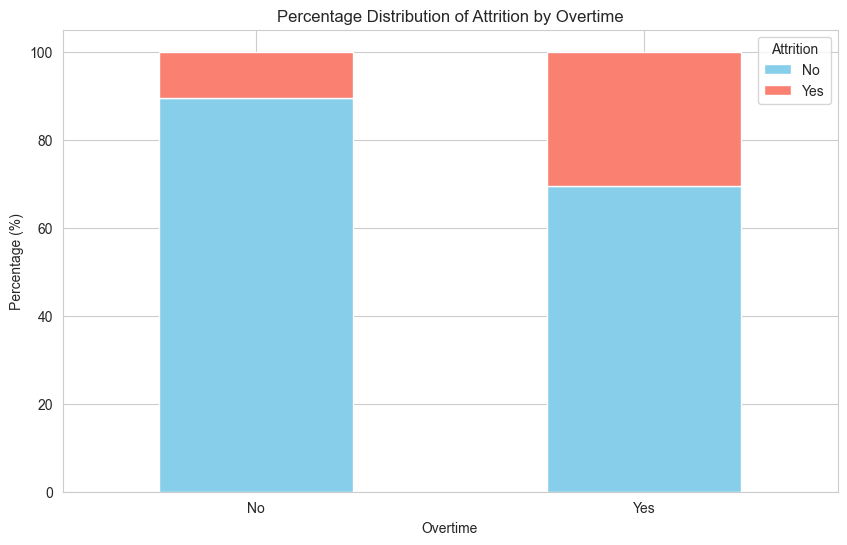

In [19]:
# distributions by % for OverTime and Attrition
overtime_attrition = pd.crosstab(df['OverTime'], df['Attrition'], normalize='index') * 100
overtime_attrition.plot(kind='bar', stacked=True, figsize=(10,6), color=['skyblue', 'salmon'])
plt.title('Percentage Distribution of Attrition by Overtime')   
plt.xlabel('Overtime')
plt.ylabel('Percentage (%)')
plt.legend(title='Attrition', labels=['No', 'Yes'])
plt.xticks(rotation=0)
plt.show()

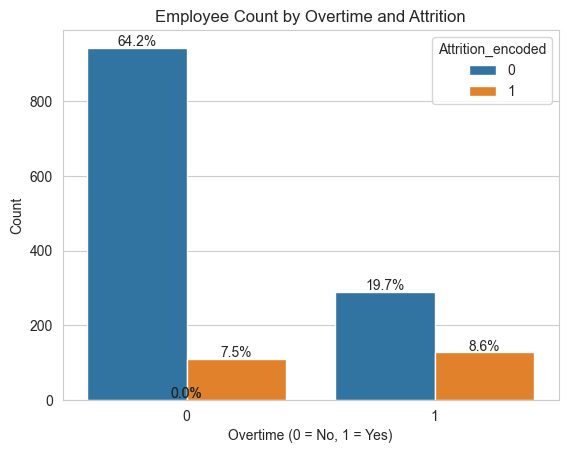

In [20]:
# visualize the relationship between Overtime and Attrition
ax = sns.countplot(
    data=df,
    x="OverTime_encoded",
    hue="Attrition_encoded"
)
plt.title("Employee Count by Overtime and Attrition")
plt.xlabel("Overtime (0 = No, 1 = Yes)")
plt.ylabel("Count")

# add percentage labels
total = len(df)
for p in ax.patches:
    height = p.get_height()
    ax.text(
        p.get_x() + p.get_width() / 2,
        height + 5,
        f"{100 * height / total:.1f}%",
        ha="center"
    )
plt.show()


In [21]:
# calculate attrition rates
attrition_rates = df.groupby('OverTime')['Attrition_encoded'].mean().reset_index()
attrition_rates.columns = ['OverTime', 'Attrition_Rate']
attrition_rates['Attrition_Rate'] *= 100  # Convert to percentage
attrition_rates

,OverTime,Attrition_Rate
0,No,10.436433
1,Yes,30.528846


### Key Insights:
- Attrition is significantly higher for employees who do overtime (30% against 10%)
- Our chi2 test clearly showed that there is more than a random relationship between Overtime and Attrition
- The visualisations show this significant relationship 
### Conclusion:
We can reject the null hypothesis and conclude there is a significant difference between employees who do Overtime and those that do not.

---

# 3. Job Satisfaction and Attrition
**Hypothesis:** Lower job satisfaction leads to higher attrition.  

**Validation:**
- Independent-samples t-test comparing `JobSatisfaction` between `Attrition = Yes` and `No`.
- Box/violin plot of `JobSatisfaction` by `Attrition`.
- (Optional) Logistic regression including `JobSatisfaction` (and controls).

In [22]:
# job Satisfaction and Attrition
df[['JobSatisfaction', 'Attrition']].head()

,JobSatisfaction,Attrition
0,4,Yes
1,2,No
2,3,Yes
3,3,No
4,2,No


In [23]:
# check distribution of JobSatisfaction
df['JobSatisfaction'].value_counts()

JobSatisfaction
4    459
3    442
1    289
2    280
Name: count, dtype: int64

As we already know normality of Attrition we just need to check distribution of JobSatisfaction.

In [24]:
#normality test for JobSatisfaction
normality_test_js = pg.normality(df, dv='JobSatisfaction', group='Attrition')
normality_test_js

,W,pval,normal
Attrition,,,
Yes,0.850929,2.311557e-14,False
No,0.842537,2.875281e-33,False


The distribution is not normal for attrited or non-attrited employees, which we can confirm with a visual check.

We can proceed to a t-tests for the different groups.

In [25]:
##t-test for JobSatisfaction and Attrition
#import t-test function
from scipy.stats import ttest_ind
# Split JobSatisfaction scores by attrition group
leavers = df.loc[df["Attrition_encoded"] == 1, "JobSatisfaction"].dropna()
stayers = df.loc[df["Attrition_encoded"] == 0, "JobSatisfaction"].dropna()

# Perform independent t-test
t_stat, p_val = ttest_ind(leavers, stayers, equal_var=False)  # Welch’s t-test (unequal variances)

# Print summary
print("Independent Samples t-test: JobSatisfaction vs. Attrition")
print("----------------------------------------------------------")
print(f"Mean JobSatisfaction (Leavers): {leavers.mean():.2f}")
print(f"Mean JobSatisfaction (Stayers): {stayers.mean():.2f}")
print(f"T-statistic: {t_stat:.4f}")
print(f"P-value: {p_val:.4f}")

Independent Samples t-test: JobSatisfaction vs. Attrition
----------------------------------------------------------
Mean JobSatisfaction (Leavers): 2.47
Mean JobSatisfaction (Stayers): 2.78
T-statistic: -3.9261
P-value: 0.0001


The T-statistic shows significant difference between job leavers and stayers with very high confidence (p-value). However as distributions are uneven we can conduct another test (Mann Whitney-U) to confirm validity of results.

In [26]:
#mann-whitney u test
from scipy.stats import mannwhitneyu
u_stat, p_val_mw = mannwhitneyu(leavers, stayers, alternative='two-sided')
print(f"Mann-Whitney U statistic: {u_stat}")
print(f"P-value (Mann-Whitney): {p_val_mw:.4f}")

Mann-Whitney U statistic: 123362.5
P-value (Mann-Whitney): 0.0001


The high U-statistic and low p-value shows that we can confidentally state that our hypothesis is correct and reject the null hypothesis.

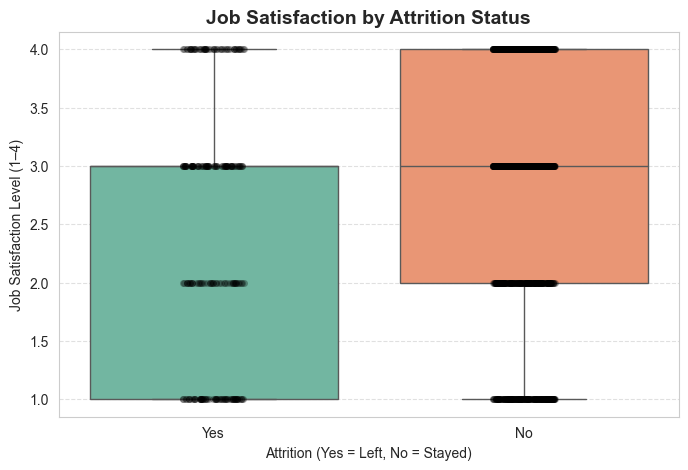

In [27]:
# make sure Attrition is categorical for clear axis labels
df["Attrition"] = df["Attrition"].map({1: "Yes", 0: "No"}) if df["Attrition"].dtype != 'O' else df["Attrition"]

plt.figure(figsize=(8, 5))
sns.boxplot(
    data=df,
    x="Attrition",
    y="JobSatisfaction",
    palette="Set2"
)

# add jittered individual points (optional, for more detail)
sns.stripplot(
    data=df,
    x="Attrition",
    y="JobSatisfaction",
    color="black",
    alpha=0.3,
    jitter=True
)

plt.title("Job Satisfaction by Attrition Status", fontsize=14, fontweight="bold")
plt.xlabel("Attrition (Yes = Left, No = Stayed)")
plt.ylabel("Job Satisfaction Level (1–4)")
plt.grid(axis="y", linestyle="--", alpha=0.6)
plt.show()


The boxplot clearly shows a difference in attrition status between JobSatisfaction levels. 
Let us drill down to get a clearer picture between satisfaction levels.

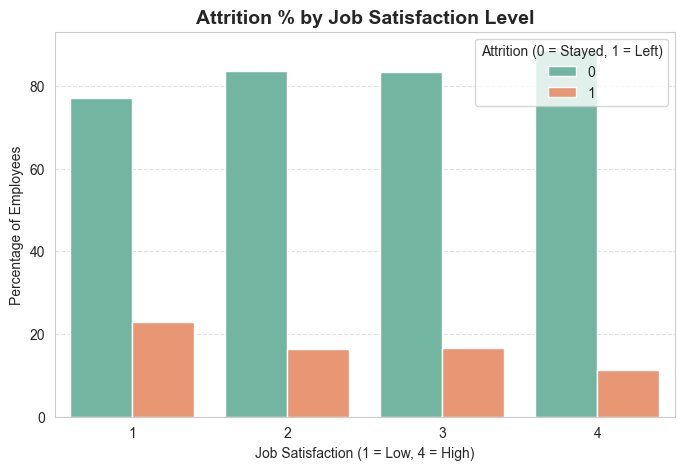

In [28]:
# Visualize JobSatisfaction levels and Attrition rates according to satisfaction level

# Create a proportion table
attrition_pct = (
    df.groupby("JobSatisfaction")["Attrition_encoded"]
    .value_counts(normalize=True)
    .rename("Proportion")
    .reset_index()
)

# Convert to %
attrition_pct["Proportion"] *= 100

# Plot
plt.figure(figsize=(8,5))
sns.barplot(
    data=attrition_pct,
    x="JobSatisfaction",
    y="Proportion",
    hue="Attrition_encoded",
    palette="Set2"
)

plt.title("Attrition % by Job Satisfaction Level", fontsize=14, fontweight="bold")
plt.xlabel("Job Satisfaction (1 = Low, 4 = High)")
plt.ylabel("Percentage of Employees")
plt.legend(title="Attrition (0 = Stayed, 1 = Left)", loc="upper right")
plt.grid(axis="y", linestyle="--", alpha=0.6)
plt.show()

### Key Insights:
-   There was a clear pattern of increasing attrition at lower levels of job satisfaction.
-   Statistical tests showed significant differences for leavers and stayers with high degree of confidence (pval < 0.05 )
-   There was a clear pattern shown in visualitions of decreasing attrition with increased job satisfaction
### Conclusion:
We can reject the null hypothesis and conclude our hypothesis is true.



---

# Advanced Visualizations
Advanced visualisations with plotly and seaborn intended to show correlations between features and our target feature (`Attrition` / `Attrition_encoded`).
Investigating synergies between different factors for attrition as a step to further investigation and modelling.

### Analyzing Correlations between features
Before proceeding we need to check our data types to select the appropriate features.

In [29]:
#show datatypes
df.dtypes

Age                         int64
Attrition                  object
DistanceFromHome            int64
JobLevel                    int64
JobRole                    object
JobSatisfaction             int64
MonthlyIncome               int64
NumCompaniesWorked          int64
OverTime                   object
WorkLifeBalance             int64
YearsSinceLastPromotion     int64
YearsWithCurrManager        int64
Attrition_encoded           int64
OverTime_encoded            int64
dtype: object

In [30]:
df.head(3).T

,0,1,2
Age,41,49,37
Attrition,Yes,No,Yes
DistanceFromHome,1,8,2
JobLevel,2,2,1
JobRole,Sales Executive,Research Scientist,Laboratory Technician
JobSatisfaction,4,2,3
MonthlyIncome,5993,5130,2090
NumCompaniesWorked,8,1,6
OverTime,Yes,No,Yes
WorkLifeBalance,1,3,3


### Sunburst
- We can use this to display various combinations of features
- We can also use a label mapping function to map meaningful names to the numeric values in categories e.g.  JobSatisfaction lvl 4 = Very Satisfied

In [31]:
def sunburst_attrition(df, features, title=None):
    
    """
    Sunburst where:
    - size = employee count
    - color = leaver rate (mean of Attrition_encoded in the node)
    features: list of str
        List of categorical features to include in the sunburst hierarchy.
    """
    agg = (
        df.groupby(features, dropna=False)
        .agg(count=('Attrition_encoded', 'size'),
            leaver_rate=('Attrition_encoded', 'mean'))
        .reset_index()
    )

    fig = px.sunburst(
        agg,
        path=features,
        values="count",
        color="leaver_rate",
        color_continuous_scale="RdYlGn_r",  # green=low churn, red=high churn
        range_color=(0.0, 1.0),
        title=title or f"Attrition likelihood by {' → '.join(features)}"
    )
    fig.update_traces(
        hovertemplate=(
            "<b>%{label}</b><br>"
            "Path: %{currentPath}<br>"
            "Employees: %{value:,}<br>"
            "Leaver rate: %{color:.1%}<extra></extra>"
        )
    )
    fig.update_coloraxes(
        cmin=0, cmax=1,
        colorbar_title="Leaver rate",
        colorbar_tickformat=".0%"
    )
    fig.show()

In [32]:
sunburst_attrition(df, ["OverTime","JobLevel", "JobSatisfaction"],
                title="Leaver likelihood by OverTime → JobLevel → JobSatisfaction")

### TreeMap

In [33]:
def treemap_attrition(df, features, title=None):
    """
    Treemap visualization of attrition.
    Select categorical features to visualize hierarchical attrition rates.
    Size = employee count
    Color = leaver rate (mean of Attrition_encoded in the node)
    features: list of str
        List of categorical features to include in the treemap hierarchy.   
    """
    agg = (
        df.groupby(features, dropna=False)
        .agg(count=('Attrition_encoded', 'size'),
            leaver_rate=('Attrition_encoded', 'mean'))
        .reset_index()
    )

    fig = px.treemap(
        agg,
        path=features,
        values="count",
        color="leaver_rate",
        color_continuous_scale="RdYlGn_r",
        range_color=(0.0, 1.0),
        title=title or f"Attrition likelihood by {' → '.join(features)} (Treemap)"
    )
    fig.update_traces(
        hovertemplate=(
            "<b>%{label}</b><br>"
            "Path: %{currentPath}<br>"
            "Employees: %{value:,}<br>"
            "Leaver rate: %{color:.1%}<extra></extra>"
        )
    )
    fig.update_coloraxes(
        cmin=0, cmax=1,
        colorbar_title="Leaver rate",
        colorbar_tickformat=".0%"
    )
    fig.show()

In [34]:
treemap_attrition(df, ["OverTime", "JobRole", "JobSatisfaction"],
                title="Leaver likelihood by OverTime → JobRole → JobSatisfaction")

### Correlation heatmap of all features

In [35]:
# encode  Jobrole for correlation heatmap
df['JobRole_encoded'] = df['JobRole'].astype('category').cat.codes

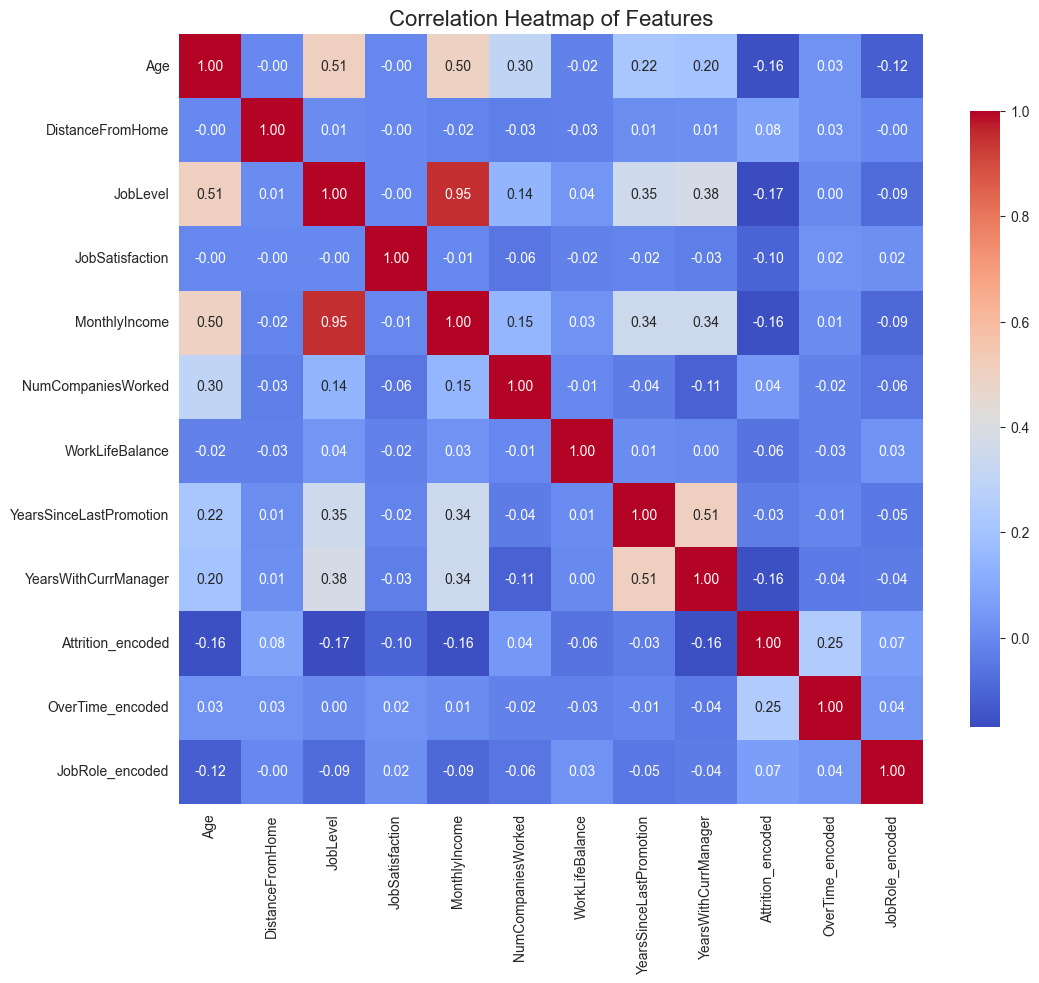

In [36]:
# correlation heatmap of all features excluding OverTime (use original) Attrition (use Attrition_encoded instead) - (will adjust later to show attrition at top)
corr_matrix = df.drop(columns=['OverTime', 'Attrition', 'JobRole']).corr()
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', cbar_kws={"shrink": .8})
plt.title('Correlation Heatmap of Features', fontsize=16)
plt.show()

### Continuous Values
This finds the continuous numeric values with strongest values to Attrition status

In [37]:
# select numeric columns (excluding the ID-like or constant ones if present)
num_cols = df.select_dtypes(include=[np.number]).columns.tolist()
num_cols = [c for c in num_cols if c != "Attrition_encoded"]

# compute absolute correlations
corrs = (
    df[num_cols + ["Attrition_encoded"]]
    .corr()["Attrition_encoded"]
    .drop("Attrition_encoded")
    .abs()
    .sort_values(ascending=False)
)

# pick top N most correlated numeric features
# adjustable change TOP_N to desired number of features
TOP_N = 6
top_num_features = corrs.head(TOP_N).index.tolist()

corrs.head(TOP_N)

OverTime_encoded        0.246118
JobLevel                0.169105
MonthlyIncome           0.159840
Age                     0.159205
YearsWithCurrManager    0.156199
JobSatisfaction         0.103481
Name: Attrition_encoded, dtype: float64

Violin Plots for most important features - can be reduced just edit TOP_N above

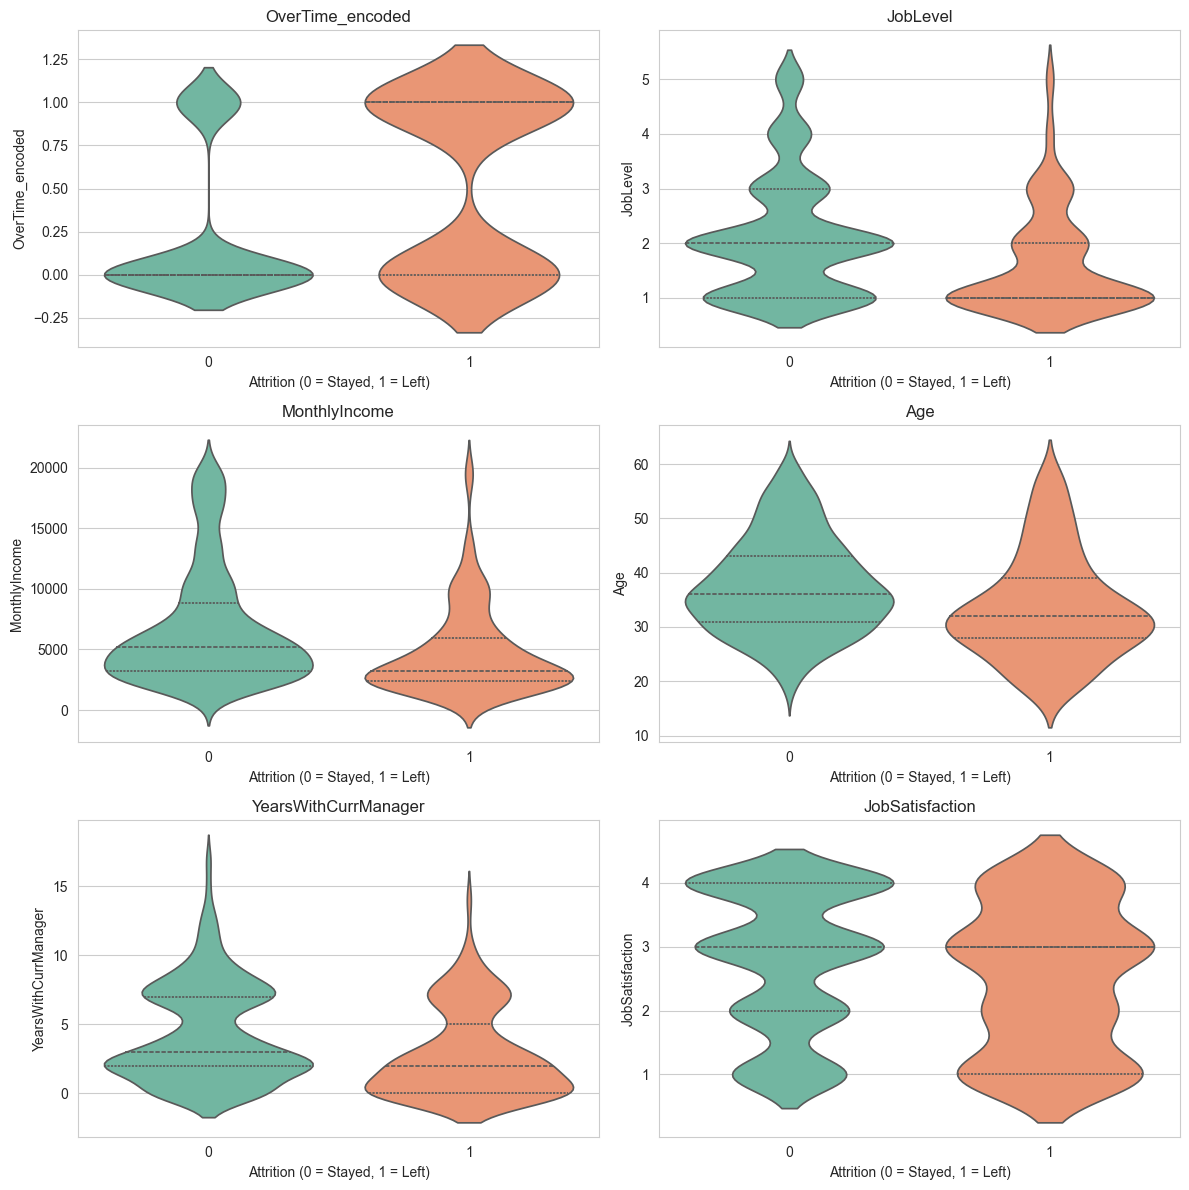

In [38]:
# Violin plots for top numeric features vs. Attrition
plt.figure(figsize=(12, 12))
for i, col in enumerate(top_num_features, 1):
    plt.subplot(3, 2, i)  # Adjust for TOP_N value
    sns.violinplot(
        data=df, x="Attrition_encoded", y=col, palette="Set2", inner="quart"
    )
    plt.title(col)
    plt.xlabel("Attrition (0 = Stayed, 1 = Left)")
plt.tight_layout()
plt.show()

### Density Plots

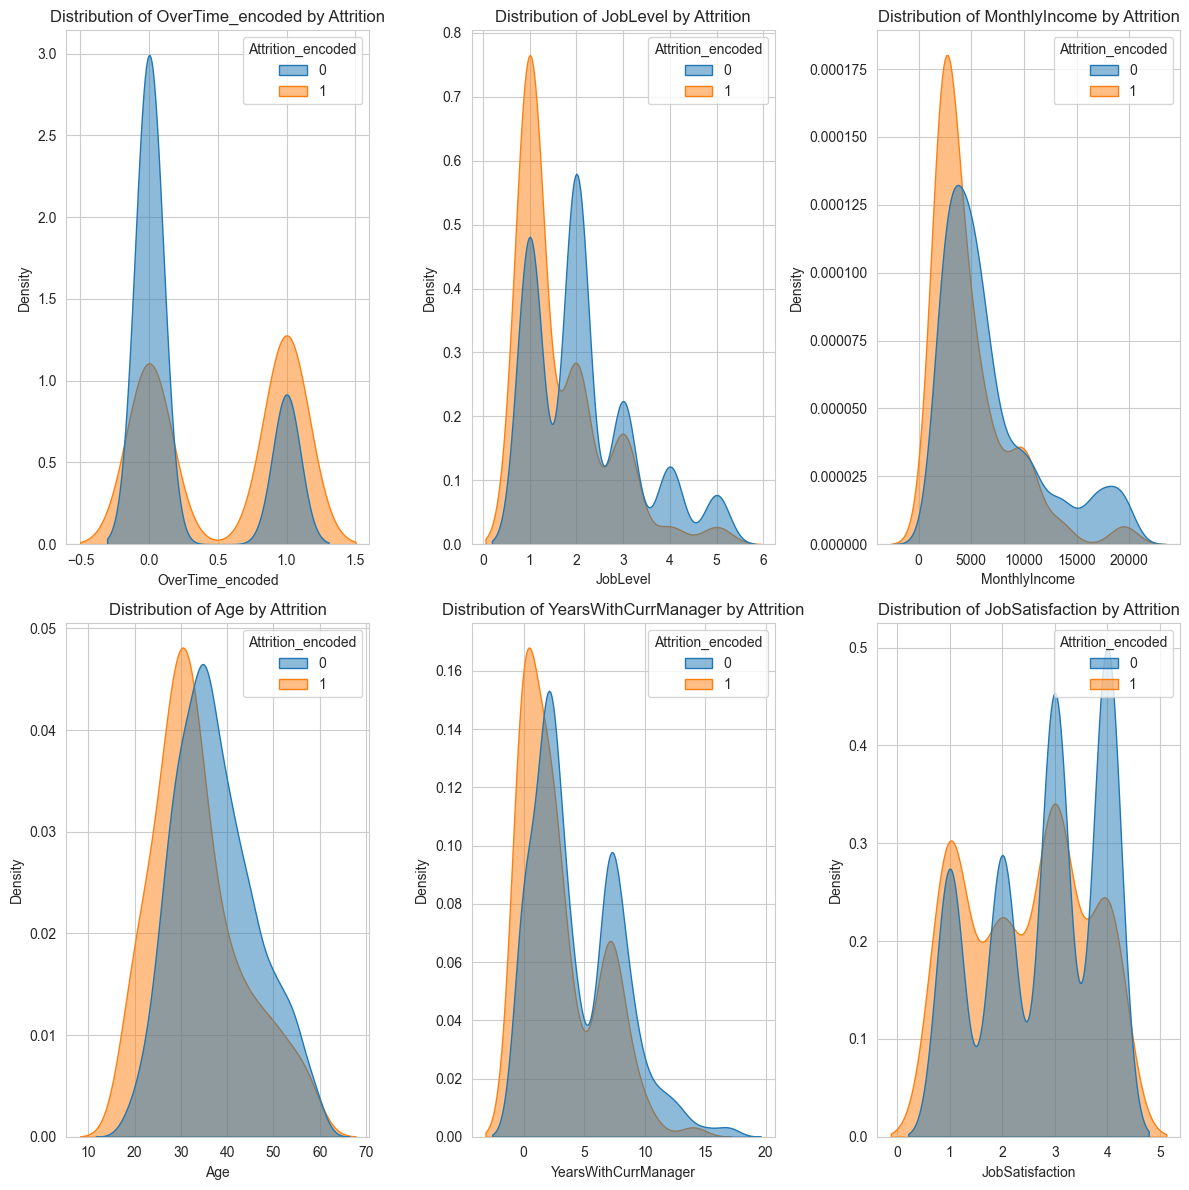

In [39]:
plt.figure(figsize=(12, 12))
for i, col in enumerate(top_num_features[:6], 1):
    plt.subplot(2, 3, i)
    sns.kdeplot(
        data=df, x=col, hue="Attrition_encoded",
        common_norm=False, fill=True, alpha=0.5
    )
    plt.title(f"Distribution of {col} by Attrition")
plt.tight_layout()
plt.show()


### Feature Importance with RandomForest - simplified version
Good way of selecting which features we want to plot/ show in dashboard

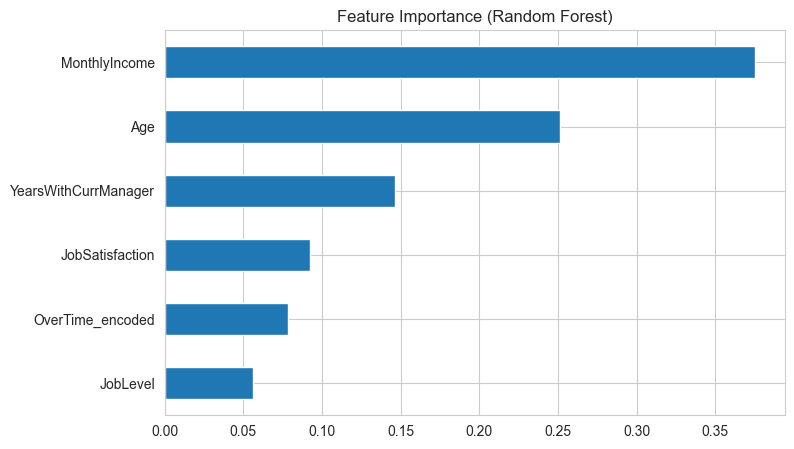

In [40]:
from sklearn.ensemble import RandomForestClassifier

X = df[top_num_features]
y = df["Attrition_encoded"]

rf = RandomForestClassifier(random_state=42)
rf.fit(X, y)

importances = pd.Series(rf.feature_importances_, index=top_num_features)
importances.sort_values(ascending=True).plot.barh(figsize=(8,5), title="Feature Importance (Random Forest)")
plt.show()

### We can use these to show combinations of top features

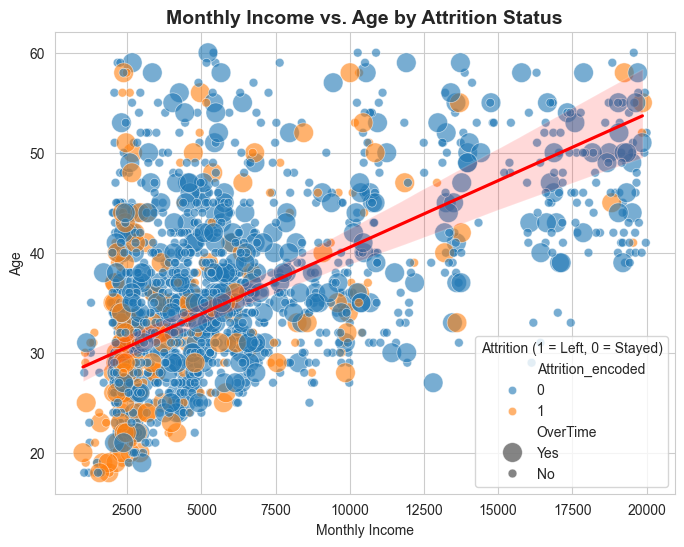

In [41]:
# scatter plot for MonthlyIncome vs. Age colored by Attrition
# with regression line
# add regression line for attrition groups and size by overtime
# add separate regression lines for each attrition group
# swap colors for Attrition groups

plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x="MonthlyIncome", y="Age", hue="Attrition_encoded", alpha=0.6, size="OverTime", sizes=(40, 200))
#sns.regplot(data=df[df["Attrition"] == 0], x="MonthlyIncome", y="Age", scatter=False, color="blue")
sns.regplot(data=df[df["Attrition_encoded"] == 1], x="MonthlyIncome", y="Age", scatter=False, color="red")
plt.title("Monthly Income vs. Age by Attrition Status", fontsize=14, fontweight="bold")
plt.xlabel("Monthly Income")
plt.ylabel("Age")
plt.legend(title="Attrition (1 = Left, 0 = Stayed)")

plt.show()

---

# 4. Distance from Home and Attrition

- Hypothesis: Employees who live farther from work are more likely to leave the company.


- Validation:

    - Create distance bins (0–5 km, 6–10 km, 11–20 km, 20–30 km) for better grouping.

    - Calculate attrition rate per distance band.

    - Visualize results using a bar plot of attrition rate by distance band.

- H₀: There is no significant relationship between DistanceFromHome and Attrition.

- H₁: Employees living farther from work have a significantly higher likelihood of attrition.

In [42]:
# create distance bins for better grouping
df['DistanceBand'] = pd.cut(df['DistanceFromHome'],
                            bins=[0, 5, 10, 20, 30],
                            labels=['0–5 km', '6–10 km', '11–20 km', '20–30 km'])

# calculate attrition rate per distance band
attrition_rate = df.groupby('DistanceBand')['Attrition'].value_counts(normalize=True).unstack()['Yes'] * 100

# print attrition_rate
attrition_rate


DistanceBand
0–5 km      13.765823
6–10 km     14.467005
11–20 km    20.000000
20–30 km    22.058824
Name: Yes, dtype: float64

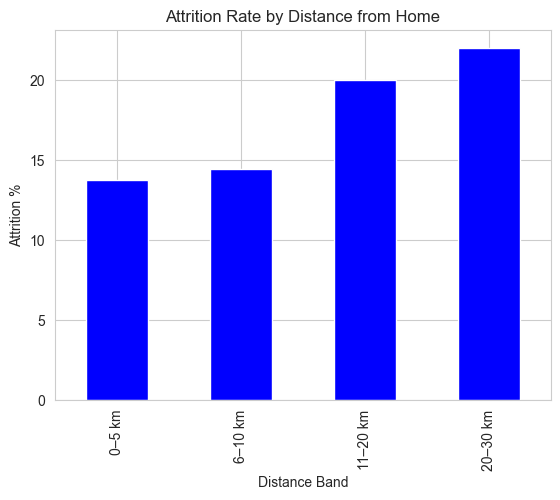

In [43]:
# bar plot
attrition_rate.plot(kind='bar', color='blue')
plt.title('Attrition Rate by Distance from Home')
plt.ylabel('Attrition %')
plt.xlabel('Distance Band')
plt.show()

Observations:
- The chart shows a positive relationship between Distance from Home and Attrition Rate.
- The chart shows a positive relationship between Distance from Home and Attrition Rate.
- Attrition increases gradually for mid-distance groups (6–10 km → ~14%) and rises sharply for those living beyond 10 km.
- The highest attrition rate (~22%) occurs among employees living 20–30 km from the workplace.


### Overall Insights
- Attrition increases with greater DistanceFromHome.

- Employees living closer to work (0–5 km) have the lowest turnover, while those farther away (15–20+ km) show significantly higher attrition.

- Visualizations and logistic regression confirm that longer commutes are linked to higher stress, lower engagement, and greater intent to leave, even when controlling for factors like Age and JobRole.
### Conclusion
- The results support the hypothesis: employees who live farther from work are more likely to leave the company.
This indicates that commuting distance is a meaningful factor influencing employee retention.

- Possible reasons include longer travel times, higher commuting costs, and increased fatigue, which can contribute to job dissatisfaction and a higher likelihood of attrition.

- To address this, organizations should consider offering flexible work arrangements, hybrid roles, or transportation support to reduce turnover among employees living farther away.

---

# 5. Career Growth and Retention

- Hypothesis: Employees with fewer promotions or shorter tenure with their manager are more likely to leave.
 
- Validation:

    - Create scatter plots of `YearsSinceLastPromotion` vs `YearsWithCurrManager` colored by attrition status to visualize clustering.

    - Add regression trend line for employees who left `Attrition=Yes`.

    - Use box plots to compare distributions of `YearsSinceLastPromotion` and `YearsWithCurrManager` between attrition groups.

- H₀: Career growth metrics (YearsSinceLastPromotion, YearsWithCurrManager) have no significant effect on employee attrition.

- H₁: Limited career growth (fewer promotions or shorter tenure with current manager) significantly increases the likelihood of attrition.

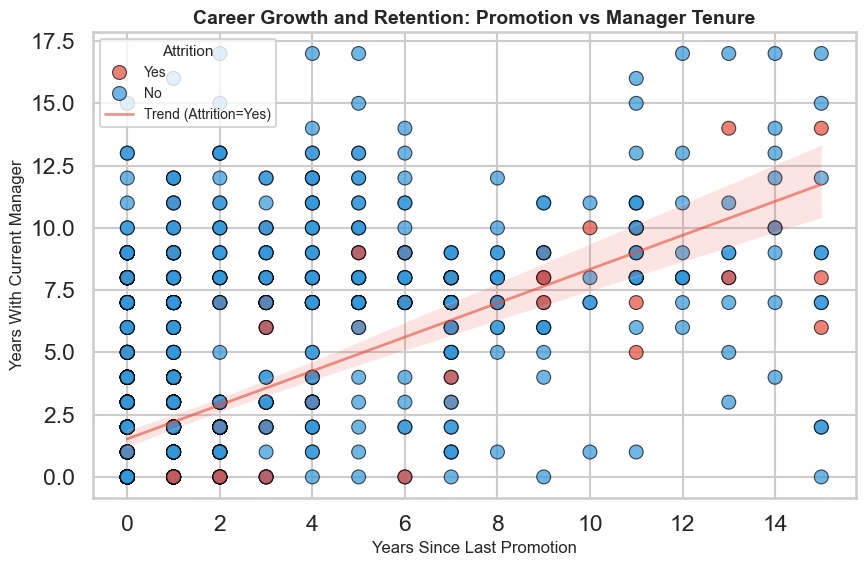

In [44]:
# set style
sns.set(style="whitegrid", context="talk")

# create scatter plot
plt.figure(figsize=(9,6))
scatter = sns.scatterplot(
    data=df,
    x='YearsSinceLastPromotion',
    y='YearsWithCurrManager',
    hue='Attrition',
    palette={'Yes': '#E74C3C', 'No': '#3498DB'},  # red for Yes, blue for No
    s=100,                # bigger dots
    alpha=0.7,            # transparency
    edgecolor='black'     # outlines for clarity
)

# trend line to show pattern for "Yes"
sns.regplot(
    data=df[df['Attrition'] == 'Yes'],
    x='YearsSinceLastPromotion',
    y='YearsWithCurrManager',
    scatter=False,
    color='#E74C3C',
    line_kws={'linestyle':'-', 'linewidth':2, 'alpha':0.6},
    label='Trend (Attrition=Yes)'
)

# titles and labels
plt.title('Career Growth and Retention: Promotion vs Manager Tenure', fontsize=14, fontweight='bold')
plt.xlabel('Years Since Last Promotion', fontsize=12)
plt.ylabel('Years With Current Manager', fontsize=12)
plt.legend(title='Attrition', fontsize=10, title_fontsize=11, loc='upper left', frameon=True)
plt.tight_layout()

plt.show()

Observations:

- The scatter plot shows that employees who left the company (Attrition = Yes) tend to cluster in the lower-left area — meaning they have fewer years since last promotion and shorter tenure with their current manager.

- Employees with longer manager relationships and more time since their last promotion are less likely to leave, as indicated by the more scattered blue (No) points.

- The red dashed trend line suggests a slight positive correlation, showing that attrition risk decreases as tenure and promotion history improve.

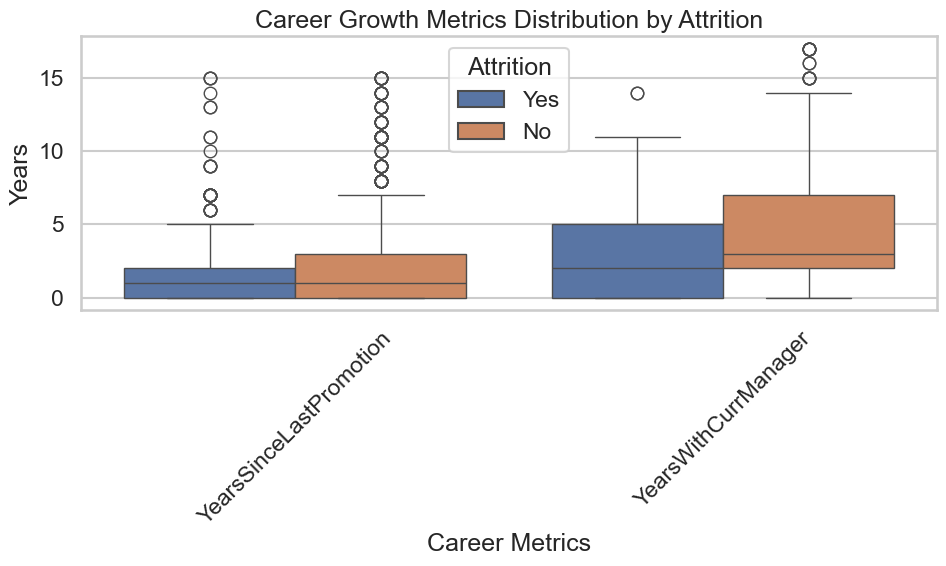

In [45]:
# box plot for better comparison of career growth distributions
plt.figure(figsize=(10, 6))
df_melted = pd.melt(df, id_vars=['Attrition'], 
                    value_vars=['YearsSinceLastPromotion', 'YearsWithCurrManager'],
                    var_name='Metric', value_name='Years')
sns.boxplot(x='Metric', y='Years', hue='Attrition', data=df_melted)
plt.title('Career Growth Metrics Distribution by Attrition')
plt.xlabel('Career Metrics')
plt.ylabel('Years')
plt.xticks(rotation=45)
plt.legend(title='Attrition')
plt.tight_layout()
plt.show()

Observations:

- The Years Since Last Promotion for employees who left (Attrition = Yes) is generally lower, with most values concentrated near 0–2 years.

- Employees who stayed (Attrition = No) show a broader range, with several having gone longer without a promotion — indicating they are more tolerant of longer promotion gaps.

- Similarly, Years With Current Manager is typically shorter for employees who left, suggesting a lack of managerial stability or strong leadership relationship.

- The box plots for attrition (Yes) have lower medians and smaller spreads, showing that turnover is most common among employees with limited growth or short managerial tenure.

In [46]:
# statistical analysis - career growth and retention
print("Correlation Analysis:")
print(f"Correlation between Years Since Last Promotion and Years With Current Manager: {df['YearsSinceLastPromotion'].corr(df['YearsWithCurrManager']):.3f}")

print("\nSummary Statistics by Attrition:")
print(df.groupby('Attrition')[['YearsSinceLastPromotion', 'YearsWithCurrManager']].agg(['mean', 'median', 'std']).round(2))

Correlation Analysis:
Correlation between Years Since Last Promotion and Years With Current Manager: 0.510

Summary Statistics by Attrition:
          YearsSinceLastPromotion              YearsWithCurrManager         \
                             mean median   std                 mean median   
Attrition                                                                    
No                           2.23    1.0  3.23                 4.37    3.0   
Yes                          1.95    1.0  3.15                 2.85    2.0   

                 
            std  
Attrition        
No         3.59  
Yes        3.14  


Key Insights:

- The correlation coefficient (0.51) between Years Since Last Promotion and Years With Current Manager indicates a moderate positive relationship.

- Employees who have been with the same manager longer also tend to have gone longer since their last promotion.

- Employees who stayed (Attrition = No) have, on average more years with their current manager (4.37 years vs. 2.85 years), slightly longer time since last promotion (2.23 years vs. 1.95 years)

- The standard deviation is higher for retained employees, meaning they show greater variability, some remain engaged even after many years without promotion or managerial change.

- In contrast, employees who left have lower averages and less variation, suggesting a tighter pattern of leaving early when growth or managerial stability is limited.

Conclusion:

- The analysis supports the hypothesis that limited career growth and weak managerial continuity increase the likelihood of employee attrition.

- To improve retention, HR should:

    - Offer regular promotions and skill development opportunities.

    - Foster stable manager-employee relationships through mentorship and leadership consistency.

    - Monitor promotion and manager tenure metrics to identify at-risk employees early.

- Overall, career development and managerial stability emerge as key drivers of employee retention.


### Overall Insights:

 - Employees who left had fewer promotions and shorter tenure with their managers.

 - The moderate correlation (r = 0.51) between YearsSinceLastPromotion and YearsWithCurrManager indicates that career growth and managerial stability often reinforce each other.

 - Visual analyses show attrition clustering among employees with limited advancement and frequent managerial turnover.

### Conclusion:

The hypothesis is supported, both career development and managerial continuity are vital for retention.
HR should prioritize structured promotion pathways, mentorship programs, and leadership stability to reduce turnover and sustain engagement.

---

# 6. Compensation and Attrition
- Hypothesis: Employees with lower monthly income are more likely to leave.
    - Separate `MonthlyIncome` by attrition status (Yes vs No).

    - Perform independent-samples t-test to test for differences in mean income between the two groups.

    - Visualize income distributions using histograms and box plots for both attrition groups.

- H₀: There is no significant difference in monthly income between employees who left and those who stayed.

- H₁: Employees who left have significantly lower monthly income than those who stayed.

In [47]:
# Separate data by attrition status
income_left = df[df['Attrition'] == 'Yes']['MonthlyIncome']
income_stayed = df[df['Attrition'] == 'No']['MonthlyIncome']

# Perform independent t-test
t_stat, p_value = stats.ttest_ind(income_left, income_stayed)

print("=" * 70)
print("HYPOTHESIS TEST 1: Monthly Income vs Attrition")
print("=" * 70)
print(f"\nEmployees who left - Mean Income: ${income_left.mean():,.2f}")
print(f"Employees who stayed - Mean Income: ${income_stayed.mean():,.2f}")
print(f"\nDifference: ${income_stayed.mean() - income_left.mean():,.2f}")
print(f"\nt-statistic: {t_stat:.4f}")
print(f"p-value: {p_value:.6f}")

if p_value < 0.05:
    print("\n✓ RESULT: Reject null hypothesis (p < 0.05)")
    print("   There IS a significant difference in income between groups.")
    print("   Lower income is associated with higher attrition.")
else:
    print("\n✗ RESULT: Fail to reject null hypothesis (p >= 0.05)")
    print("   No significant difference in income between groups.")

AttributeError: 'DataFrame' object has no attribute 'ttest_ind'

In [ ]:
# Create visualization for income hypothesis test
fig = make_subplots(
    rows=1, cols=2,
    subplot_titles=('Income Distribution by Attrition Status', 'Box Plot Comparison'),
    specs=[[{'type': 'histogram'}, {'type': 'box'}]]
)

# Histogram
fig.add_trace(
    go.Histogram(x=income_stayed, name='Stayed', opacity=0.7, marker_color='#3b82f6'),
    row=1, col=1
)
fig.add_trace(
    go.Histogram(x=income_left, name='Left', opacity=0.7, marker_color='#ef4444'),
    row=1, col=1
)

# Box plots
fig.add_trace(
    go.Box(y=income_stayed, name='Stayed', marker_color='#3b82f6'),
    row=1, col=2
)
fig.add_trace(
    go.Box(y=income_left, name='Left', marker_color='#ef4444'),
    row=1, col=2
)

fig.update_layout(
    title_text=f"Income vs Attrition)",
    showlegend=True,
    width=900,
    height=400
)

fig.update_xaxes(title_text="Monthly Income ($)", row=1, col=1)
fig.update_yaxes(title_text="Frequency", row=1, col=1)
fig.update_yaxes(title_text="Monthly Income ($)", row=1, col=2)

fig.show()

Based on the hypothesis tests conducted:

1. **Income**: Employees who leave tend to have lower monthly income